**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef

**LOADING DATASET**

In [2]:
data = pd.read_csv('C:\pd..csv')

In [3]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


**APPLYING ML MODELS**

**DECISION TREE**

Accuracy: 0.7929515418502202
Precision: 0.84375
Error Rate: 0.2070484581497798
Specificity: 0.375
Recall: 0.9050279329608939
F1 Score: 0.8733153638814016
MCC: 0.3166385968223169
LR+: 1.4480446927374302
LR-: 0.2532588454376163


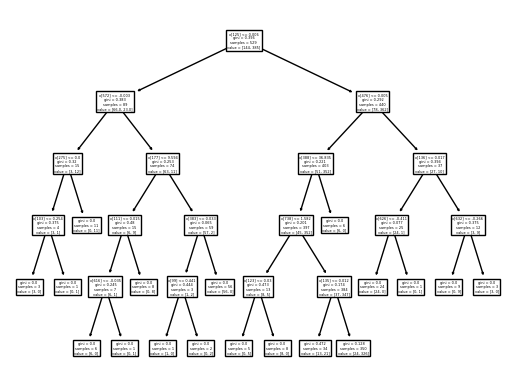

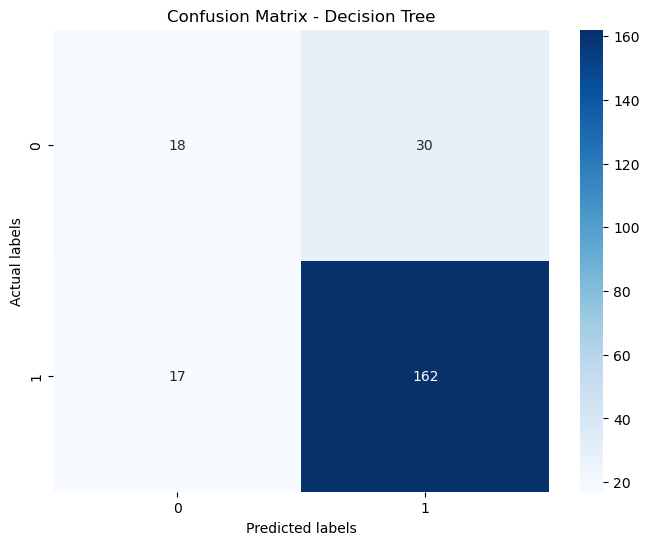

In [4]:
X = data.iloc[:, 1:754]
y = data.iloc[:, 754]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, predDT)

print("Accuracy:", accuracy_score(y_test, predDT))

precision = precision_score(y_test, predDT)

error_rate = 1 - accuracy_score(y_test, predDT)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

recall = recall_score(y_test, predDT)

f1 = f1_score(y_test, predDT)

mcc = matthews_corrcoef(y_test, predDT)

lr_plus = recall / (1 - specificity)
lr_minus = (1 - recall) / specificity

print("Precision:", precision)
print("Error Rate:", error_rate)
print("Specificity:", specificity)
print("Recall:", recall)
print("F1 Score:", f1)
print("MCC:", mcc)
print("LR+:", lr_plus)
print("LR-:", lr_minus)

plot_tree(clf)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**SUPPORT VECTOR CLASSIFIER**

Accuracy: 0.7357
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        60
           1       0.75      0.95      0.84       167

    accuracy                           0.74       227
   macro avg       0.63      0.54      0.53       227
weighted avg       0.69      0.74      0.67       227

Error Rate: 0.2643
Specificity: 0.1333
MCC: 0.1472
FPR: 0.8667
LR+: 3.0577
LR-: 1.0000


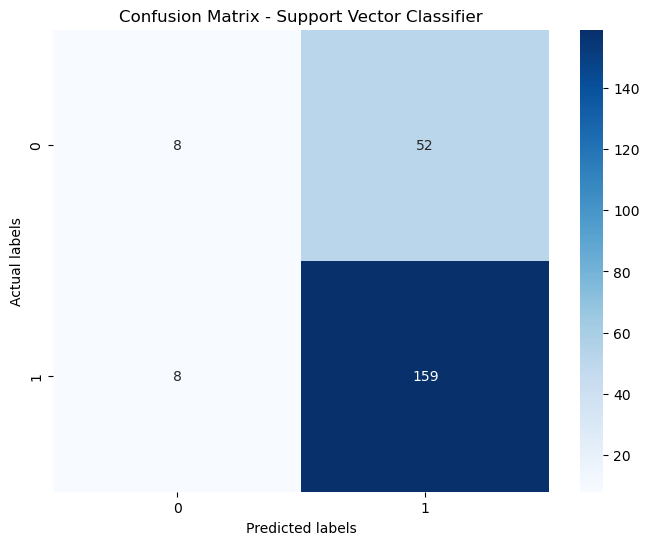

In [5]:
X = data.iloc[:, 1:754]
y = data.iloc[:, 754]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# SVC model
svc_model = SVC(random_state=2)
svc_model = svc_model.fit(X_train, y_train)
predSVC = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, predSVC)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, predSVC))  # Use classification_report function

conf_matrix = confusion_matrix(y_test, predSVC)

total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

fpr = fp / (fp + tn)

lr_plus = tp / fp
lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**RANDOM FOREST**

Accuracy: 0.8546
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.52      0.65        60
           1       0.85      0.98      0.91       167

    accuracy                           0.85       227
   macro avg       0.87      0.75      0.78       227
weighted avg       0.86      0.85      0.84       227

Error Rate: 0.1454
Specificity: 0.5167
MCC: 0.6017
FPR: 0.4833
LR+: 5.6207
LR-: 0.1290


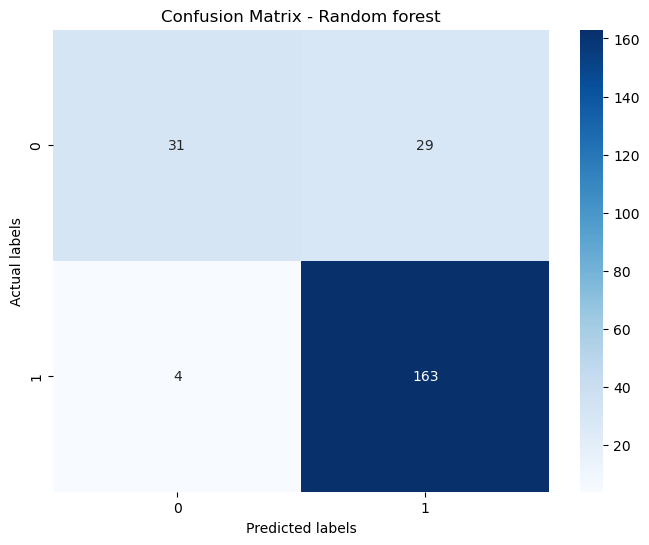

In [6]:
X = data.iloc[:, 1:754]
y = data.iloc[:, 754]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=2)
rf_model = rf_model.fit(X_train, y_train)
predRF = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, predRF)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, predRF))

conf_matrix = confusion_matrix(y_test, predRF)

total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

fpr = fp / (fp + tn)

lr_plus = tp / fp

lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random forest")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**EXTREME GRADIENT BOOST**

Accuracy: 0.8943
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        53
           1       0.91      0.95      0.93       174

    accuracy                           0.89       227
   macro avg       0.87      0.83      0.84       227
weighted avg       0.89      0.89      0.89       227

Error Rate: 0.1057
Specificity: 0.6981
MCC: 0.6920
FPR: 0.3019
LR+: 10.3750
LR-: 0.2162


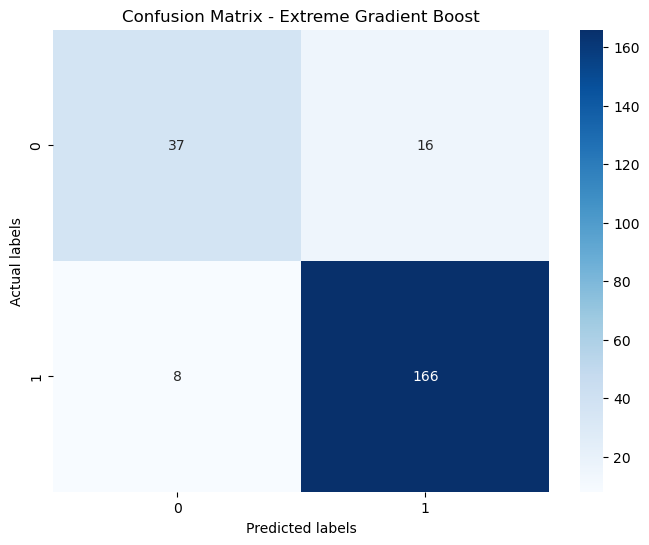

In [7]:
X = data.iloc[:, 1:754]
y = data.iloc[:, 754]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
xgb_model = xgb.XGBClassifier(random_state=8)
xgb_model = xgb_model.fit(X_train, y_train)
predXGB = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predXGB)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, predXGB))

conf_matrix = confusion_matrix(y_test, predXGB)

total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

fpr = fp / (fp + tn)

lr_plus = tp / fp
lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Extreme Gradient Boost")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

**LOGISTIC REGRESSION**

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7313
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        61
           1       0.77      0.89      0.83       166

    accuracy                           0.73       227
   macro avg       0.64      0.59      0.60       227
weighted avg       0.70      0.73      0.71       227

Error Rate: 0.2687
Specificity: 0.2951
MCC: 0.2265
FPR: 0.7049
LR+: 3.4419
LR-: 1.0000


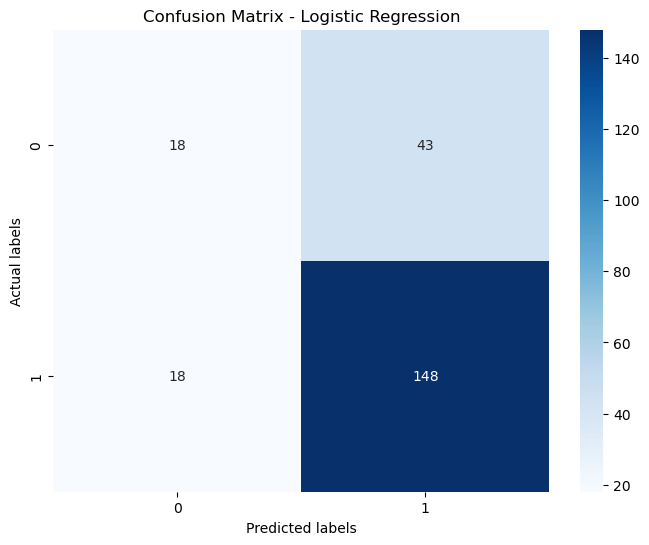

In [8]:
X = data.iloc[:, 1:754]
y = data.iloc[:, 754]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)
predLR = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, predLR)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, predLR))

conf_matrix = confusion_matrix(y_test, predLR)

total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
error = total_samples - correct_predictions
error_rate = error / total_samples
print(f"Error Rate: {error_rate:.4f}")

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
specificity = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity:.4f}")

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

fpr = fp / (fp + tn)

lr_plus = tp / fp

lr_minus = fn / tn

print(f"MCC: {mcc:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"LR+: {lr_plus:.4f}")
print(f"LR-: {lr_minus:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()